In [1]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import argparse
from copy import deepcopy
import torch
import gym
import time
import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/ml100.vtree', '/root/PySDD/notebooks/ml100.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=100
        self.card=20
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [46], 1: [59], 2: [53, 63, 86], 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96], 4: [24, 26, 37, 71, 83, 87, 94, 99], 5: [96], 6: [38], 7: [85], 8: [19, 64], 9: [], 10: [], 11: [], 12: [17, 79, 81], 13: [17, 23, 24, 25, 26, 30, 36, 42, 54, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 14: [], 15: [], 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89], 17: [3, 12, 13, 16, 24, 25, 27, 29, 35, 39, 42, 46, 51, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 85, 89, 92, 96], 18: [], 19: [8, 37, 64, 70, 91], 20: [], 21: [], 22: [3, 30, 61, 66, 78, 81, 85, 90, 96], 23: [3, 13, 61, 66, 89], 24: [3, 4, 13, 16, 17, 25, 26, 27, 31, 34, 38, 42, 51, 54, 56, 61, 66, 68, 72, 74, 76, 77, 81, 84, 87, 89, 99], 25: [13, 16, 17, 24, 27, 35, 36, 39, 40, 42, 48, 51, 52, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 26: [3, 4, 13, 24, 34, 42, 54, 66, 74, 77, 81, 83, 92, 97], 27: [16, 17, 24, 25, 35, 39, 46, 51, 52, 61, 68, 76, 87, 99], 28: [], 29: [17, 35, 56, 66, 72, 79, 81, 89], 30: [13, 22, 54, 61, 66, 73, 75, 78, 81, 95], 31: [24, 46, 51, 52, 61, 76, 79], 32: [], 33: [], 34: [3, 24, 26, 54, 66, 71, 74, 77, 81, 84, 94], 35: [16, 17, 25, 27, 29, 36, 39, 40, 46, 48, 52, 56, 61, 66, 72, 76, 77, 81, 89], 36: [13, 25, 35, 42, 56, 57, 66, 77, 81, 84, 89, 92], 37: [4, 19, 51, 64, 87, 99], 38: [6, 24, 51, 63, 67, 99], 39: [16, 17, 25, 27, 35, 48, 56, 61, 76, 77, 81, 85, 89], 40: [25, 35], 41: [], 42: [13, 16, 17, 24, 25, 26, 36, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 43: [], 44: [51, 74], 45: [], 46: [0, 16, 17, 27, 31, 35, 51, 52, 61, 76, 96], 47: [], 48: [16, 25, 35, 39, 56, 61, 66, 77, 89], 49: [], 50: [], 51: [3, 17, 24, 25, 27, 31, 37, 38, 44, 46, 61, 68, 76, 87, 94, 99], 52: [17, 25, 27, 31, 35, 46, 61, 72, 76, 79, 81, 89], 53: [2, 70, 86, 93], 54: [13, 17, 24, 25, 26, 30, 34, 42, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 55: [], 56: [13, 16, 17, 24, 25, 29, 35, 36, 39, 42, 48, 54, 61, 66, 77, 81, 84, 89, 92], 57: [36], 58: [], 59: [1], 60: [], 61: [3, 13, 16, 17, 22, 23, 24, 25, 27, 30, 31, 35, 39, 42, 46, 48, 51, 52, 54, 56, 66, 72, 76, 77, 79, 81, 84, 85, 87, 89, 90, 96], 62: [], 63: [2, 38], 64: [8, 19, 37, 74, 87, 91], 65: [], 66: [3, 13, 16, 17, 22, 23, 24, 25, 26, 29, 30, 34, 35, 36, 42, 48, 54, 56, 61, 72, 73, 74, 76, 77, 81, 84, 85, 89, 92], 67: [38], 68: [13, 24, 25, 27, 42, 51, 54, 87, 99], 69: [], 70: [19, 53], 71: [4, 34, 74], 72: [13, 16, 17, 24, 25, 29, 35, 42, 52, 54, 61, 66, 76, 79, 81, 89], 73: [30, 66, 78, 84], 74: [3, 24, 26, 34, 44, 64, 66, 71, 77, 83], 75: [30], 76: [16, 17, 24, 25, 27, 31, 35, 39, 42, 46, 51, 52, 61, 66, 72, 79, 81, 89, 96], 77: [13, 17, 24, 25, 26, 34, 35, 36, 39, 42, 48, 54, 56, 61, 66, 74, 81, 84, 89, 92], 78: [22, 30, 73, 85, 90], 79: [12, 17, 29, 31, 52, 61, 72, 76, 81, 89], 80: [], 81: [3, 12, 13, 16, 17, 22, 24, 25, 26, 29, 30, 34, 35, 36, 39, 42, 52, 54, 56, 61, 66, 72, 76, 77, 79, 84, 85, 89, 92, 95], 82: [], 83: [4, 26, 74], 84: [13, 16, 24, 25, 34, 36, 42, 54, 56, 61, 66, 73, 77, 81, 89], 85: [3, 7, 17, 22, 39, 61, 66, 78, 81, 89, 90], 86: [2, 53, 88, 91], 87: [3, 4, 24, 27, 37, 51, 61, 64, 68, 91, 94, 99], 88: [86], 89: [3, 13, 16, 17, 23, 24, 25, 29, 35, 36, 39, 42, 48, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 84, 85, 92], 90: [3, 22, 61, 78, 85], 91: [19, 64, 86, 87, 94], 92: [13, 17, 25, 26, 36, 42, 54, 56, 66, 77, 81, 89, 95], 93: [53], 94: [4, 34, 51, 87, 91, 99], 95: [13, 30, 54, 81, 92], 96: [3, 5, 17, 22, 46, 61, 76], 97: [26], 98: [], 99: [4, 24, 27, 37, 38, 51, 68, 87, 94]}

def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT#/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [2]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import argparse
from copy import deepcopy
import torch
import gym
import time
import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/yahoo.vtree', '/root/PySDD/notebooks/yahoo.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=24
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
#legalList={0: [46], 1: [59], 2: [53, 63, 86], 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96], 4: [24, 26, 37, 71, 83, 87, 94, 99], 5: [96], 6: [38], 7: [85], 8: [19, 64], 9: [], 10: [], 11: [], 12: [17, 79, 81], 13: [17, 23, 24, 25, 26, 30, 36, 42, 54, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 14: [], 15: [], 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89], 17: [3, 12, 13, 16, 24, 25, 27, 29, 35, 39, 42, 46, 51, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 85, 89, 92, 96], 18: [], 19: [8, 37, 64, 70, 91], 20: [], 21: [], 22: [3, 30, 61, 66, 78, 81, 85, 90, 96], 23: [3, 13, 61, 66, 89], 24: [3, 4, 13, 16, 17, 25, 26, 27, 31, 34, 38, 42, 51, 54, 56, 61, 66, 68, 72, 74, 76, 77, 81, 84, 87, 89, 99], 25: [13, 16, 17, 24, 27, 35, 36, 39, 40, 42, 48, 51, 52, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 26: [3, 4, 13, 24, 34, 42, 54, 66, 74, 77, 81, 83, 92, 97], 27: [16, 17, 24, 25, 35, 39, 46, 51, 52, 61, 68, 76, 87, 99], 28: [], 29: [17, 35, 56, 66, 72, 79, 81, 89], 30: [13, 22, 54, 61, 66, 73, 75, 78, 81, 95], 31: [24, 46, 51, 52, 61, 76, 79], 32: [], 33: [], 34: [3, 24, 26, 54, 66, 71, 74, 77, 81, 84, 94], 35: [16, 17, 25, 27, 29, 36, 39, 40, 46, 48, 52, 56, 61, 66, 72, 76, 77, 81, 89], 36: [13, 25, 35, 42, 56, 57, 66, 77, 81, 84, 89, 92], 37: [4, 19, 51, 64, 87, 99], 38: [6, 24, 51, 63, 67, 99], 39: [16, 17, 25, 27, 35, 48, 56, 61, 76, 77, 81, 85, 89], 40: [25, 35], 41: [], 42: [13, 16, 17, 24, 25, 26, 36, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 43: [], 44: [51, 74], 45: [], 46: [0, 16, 17, 27, 31, 35, 51, 52, 61, 76, 96], 47: [], 48: [16, 25, 35, 39, 56, 61, 66, 77, 89], 49: [], 50: [], 51: [3, 17, 24, 25, 27, 31, 37, 38, 44, 46, 61, 68, 76, 87, 94, 99], 52: [17, 25, 27, 31, 35, 46, 61, 72, 76, 79, 81, 89], 53: [2, 70, 86, 93], 54: [13, 17, 24, 25, 26, 30, 34, 42, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 55: [], 56: [13, 16, 17, 24, 25, 29, 35, 36, 39, 42, 48, 54, 61, 66, 77, 81, 84, 89, 92], 57: [36], 58: [], 59: [1], 60: [], 61: [3, 13, 16, 17, 22, 23, 24, 25, 27, 30, 31, 35, 39, 42, 46, 48, 51, 52, 54, 56, 66, 72, 76, 77, 79, 81, 84, 85, 87, 89, 90, 96], 62: [], 63: [2, 38], 64: [8, 19, 37, 74, 87, 91], 65: [], 66: [3, 13, 16, 17, 22, 23, 24, 25, 26, 29, 30, 34, 35, 36, 42, 48, 54, 56, 61, 72, 73, 74, 76, 77, 81, 84, 85, 89, 92], 67: [38], 68: [13, 24, 25, 27, 42, 51, 54, 87, 99], 69: [], 70: [19, 53], 71: [4, 34, 74], 72: [13, 16, 17, 24, 25, 29, 35, 42, 52, 54, 61, 66, 76, 79, 81, 89], 73: [30, 66, 78, 84], 74: [3, 24, 26, 34, 44, 64, 66, 71, 77, 83], 75: [30], 76: [16, 17, 24, 25, 27, 31, 35, 39, 42, 46, 51, 52, 61, 66, 72, 79, 81, 89, 96], 77: [13, 17, 24, 25, 26, 34, 35, 36, 39, 42, 48, 54, 56, 61, 66, 74, 81, 84, 89, 92], 78: [22, 30, 73, 85, 90], 79: [12, 17, 29, 31, 52, 61, 72, 76, 81, 89], 80: [], 81: [3, 12, 13, 16, 17, 22, 24, 25, 26, 29, 30, 34, 35, 36, 39, 42, 52, 54, 56, 61, 66, 72, 76, 77, 79, 84, 85, 89, 92, 95], 82: [], 83: [4, 26, 74], 84: [13, 16, 24, 25, 34, 36, 42, 54, 56, 61, 66, 73, 77, 81, 89], 85: [3, 7, 17, 22, 39, 61, 66, 78, 81, 89, 90], 86: [2, 53, 88, 91], 87: [3, 4, 24, 27, 37, 51, 61, 64, 68, 91, 94, 99], 88: [86], 89: [3, 13, 16, 17, 23, 24, 25, 29, 35, 36, 39, 42, 48, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 84, 85, 92], 90: [3, 22, 61, 78, 85], 91: [19, 64, 86, 87, 94], 92: [13, 17, 25, 26, 36, 42, 54, 56, 66, 77, 81, 89, 95], 93: [53], 94: [4, 34, 51, 87, 91, 99], 95: [13, 30, 54, 81, 92], 96: [3, 5, 17, 22, 46, 61, 76], 97: [26], 98: [], 99: [4, 24, 27, 37, 38, 51, 68, 87, 94]}
legalList={0: [13, 18],
 1: [17, 20, 22],
 2: [4, 5, 10, 13, 14, 16, 17, 18, 20, 22],
 3: [5, 9, 11, 12, 15],
 4: [2, 10, 13, 14, 16, 17, 18, 20, 22],
 5: [2, 3, 6, 9, 10, 11, 12, 14, 16],
 6: [5, 15],
 7: [],
 8: [],
 9: [3, 5, 11, 12, 15],
 10: [2, 4, 5, 14, 16, 22],
 11: [3, 5, 9, 12, 15],
 12: [3, 5, 9, 11, 15],
 13: [0, 2, 4, 14, 18, 22],
 14: [2, 4, 5, 10, 13, 16, 17, 18, 20, 22],
 15: [3, 6, 9, 11, 12, 17, 19, 20],
 16: [2, 4, 5, 10, 14, 22],
 17: [1, 2, 4, 14, 15, 19, 20, 22],
 18: [0, 2, 4, 13, 14, 22],
 19: [15, 17, 20],
 20: [1, 2, 4, 14, 15, 17, 19, 22],
 21: [],
 22: [1, 2, 4, 10, 13, 14, 16, 17, 18, 20],
 23: []}
def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT#/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [14]:
Q= np.load('Q24.npy')
rewards=[]
constraints=[]
import gym

# https://github.com/openai/gym/blob/master/gym/core.py
class Normalizedenv2(gym.ActionWrapper):
    """ Wrap action """

    def action(self, action):
        act_k = (self.action_space.high - self.action_space.low)/ 2.
        act_b = (self.action_space.high + self.action_space.low)/ 2.
        return act_k * action + act_b

    def reverse_action(self, action):
        act_k_inv = 2./(self.action_space.high - self.action_space.low)
        act_b = (self.action_space.high + self.action_space.low)/ 2.
        return act_k_inv * (action - act_b)
import os
import torch
from torch.autograd import Variable

USE_CUDA = torch.cuda.is_available()
FLOAT = torch.cuda.FloatTensor if USE_CUDA else torch.FloatTensor


def to_numpy(var):
    return var.cpu().data.numpy() if USE_CUDA else var.data.numpy()

def to_tensor(ndarray, volatile=False, requires_grad=False, dtype=FLOAT):
    return Variable(
        torch.from_numpy(ndarray), volatile=volatile, requires_grad=requires_grad
    ).type(dtype)

def soft_update(target, source, tau):
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(
            target_param.data * (1.0 - tau) + param.data * tau
        )

def hard_update(target, source):
    for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)

def get_output_folder(parent_dir, env2_name):
    """Return save folder.
    Assumes folders in the parent_dir have suffix -run{run
    number}. Finds the highest run number and sets the output folder
    to that number + 1. This is just convenient so that if you run the
    same script multiple times tensorboard can plot all of the results
    on the same plots with different names.
    Parameters
    ----------
    parent_dir: str
      Path of the directory containing all experiment runs.
    Returns
    -------
    parent_dir/run_dir
      Path to this run's save directory.
    """
    os.makedirs(parent_dir, exist_ok=True)
    experiment_id = 0
    for folder_name in os.listdir(parent_dir):
        if not os.path.isdir(os.path.join(parent_dir, folder_name)):
            continue
        try:
            folder_name = int(folder_name.split('-run')[-1])
            if folder_name > experiment_id:
                experiment_id = folder_name
        except:
            pass
    experiment_id += 1

    parent_dir = os.path.join(parent_dir, env2_name)
    parent_dir = parent_dir + '-run{}'.format(experiment_id)
    os.makedirs(parent_dir, exist_ok=True)
    return parent_dir
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
class Evaluator(object):

    def __init__(self, num_episodes, interval, save_path='', max_episode_length=None):
        self.num_episodes = num_episodes
        self.max_episode_length = max_episode_length
        self.interval = interval
        self.save_path = save_path
        self.results = np.array([]).reshape(num_episodes,0)

    def __call__(self, env2, policy, debug=False, visualize=False, save=True):

        self.is_training = False
        observation = None
        result = []

        for episode in range(self.num_episodes):

            # reset at the start of episode
            observation = env2.reset()
            episode_steps = 0
            episode_reward = 0.

            assert observation is not None

            # start episode
            done = False
            while not done:
                # basic operation, action ,reward, blablabla ...
                action = policy(observation)

                observation, reward, done, info = env2.step(action)
                if self.max_episode_length and episode_steps >= self.max_episode_length -1:
                    done = True

                # update
                episode_reward += reward
                episode_steps += 1
            result.append(episode_reward)

        result = np.array(result).reshape(-1,1)
        self.results = np.hstack([self.results, result])

        if save:
            self.save_results('{}/validate_reward'.format(self.save_path))
        return np.mean(result)

    def save_results(self, fn):

        y = np.mean(self.results, axis=0)
        error=np.std(self.results, axis=0)

        x = range(0,self.results.shape[1]*self.interval,self.interval)
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        plt.xlabel('Timestep')
        plt.ylabel('Average Reward')
        ax.errorbar(x, y, yerr=error, fmt='-o')
        plt.savefig(fn+'.png')
        savemat(fn+'.mat', {'reward':self.results})
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

#from ipdb import set_trace as debug

def fanin_init(size, fanin=None):
    fanin = fanin or size[0]
    v = 1. / np.sqrt(fanin)
    return torch.Tensor(size).uniform_(-v, v)

class Actor(nn.Module):
    def __init__(self, nb_states, nb_actions, hidden1=400, hidden2=300, init_w=3e-3):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(nb_states, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, nb_actions)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.init_weights(init_w)
        self.sigmoid=nn.Sigmoid()
    def init_weights(self, init_w):
        self.fc1.weight.data = fanin_init(self.fc1.weight.data.size())
        self.fc2.weight.data = fanin_init(self.fc2.weight.data.size())
        self.fc3.weight.data.uniform_(-init_w, init_w)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out=self.sigmoid(out)
        return out

class Critic(nn.Module):
    def __init__(self, nb_states, nb_actions, hidden1=400, hidden2=300, init_w=3e-3):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(nb_states, hidden1)
        self.fc2 = nn.Linear(hidden1 +nb_actions, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.relu = nn.ReLU()
        self.init_weights(init_w)

    def init_weights(self, init_w):
        self.fc1.weight.data = fanin_init(self.fc1.weight.data.size())
        self.fc2.weight.data = fanin_init(self.fc2.weight.data.size())
        self.fc3.weight.data.uniform_(-init_w, init_w)

    def forward(self, xs):
        x, a = xs
        out = self.fc1(x)
        out = self.relu(out)
        # debug()
        if len(a.shape)==1:
            a=a.view([1,a.shape[0]])
        out = self.fc2(torch.cat([out,a],1))
        out = self.relu(out)
        out = self.fc3(out)
        return out

from collections import deque, namedtuple
import warnings
import random

import numpy as np

# [reference] https://github.com/matthiasplappert/keras-rl/blob/master/rl/memory.py

# This is to be understood as a transition: Given `state0`, performing `action`
# yields `reward` and results in `state1`, which might be `terminal`.
Experience = namedtuple('Experience', 'state0, action, reward, state1, terminal1')


def sample_batch_indexes(low, high, size):
    if high - low >= size:
        # We have enough data. Draw without replacement, that is each index is unique in the
        # batch. We cannot use `np.random.choice` here because it is horribly inefficient as
        # the memory grows. See https://github.com/numpy/numpy/issues/2764 for a discussion.
        # `random.sample` does the same thing (drawing without replacement) and is way faster.
        try:
            r = xrange(low, high)
        except NameError:
            r = range(low, high)
        batch_idxs = random.sample(r, size)
    else:
        # Not enough data. Help ourselves with sampling from the range, but the same index
        # can occur multiple times. This is not good and should be avoided by picking a
        # large enough warm-up phase.
        warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
        batch_idxs = np.random.random_integers(low, high - 1, size=size)
    assert len(batch_idxs) == size
    return batch_idxs


class RingBuffer(object):
    def __init__(self, maxlen):
        self.maxlen = maxlen
        self.start = 0
        self.length = 0
        self.data = [None for _ in range(maxlen)]

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        if idx < 0 or idx >= self.length:
            raise KeyError()
        return self.data[(self.start + idx) % self.maxlen]

    def append(self, v):
        if self.length < self.maxlen:
            # We have space, simply increase the length.
            self.length += 1
        elif self.length == self.maxlen:
            # No space, "remove" the first item.
            self.start = (self.start + 1) % self.maxlen
        else:
            # This should never happen.
            raise RuntimeError()
        self.data[(self.start + self.length - 1) % self.maxlen] = v


def zeroed_observation(observation):
    if hasattr(observation, 'shape'):
        return np.zeros(observation.shape)
    elif hasattr(observation, '__iter__'):
        out = []
        for x in observation:
            out.append(zeroed_observation(x))
        return out
    else:
        return 0.


class Memory(object):
    def __init__(self, window_length, ignore_episode_boundaries=False):
        self.window_length = window_length
        self.ignore_episode_boundaries = ignore_episode_boundaries

        self.recent_observations = deque(maxlen=window_length)
        self.recent_terminals = deque(maxlen=window_length)

    def sample(self, batch_size, batch_idxs=None):
        raise NotImplementedError()

    def append(self, observation, action, reward, terminal, training=True):
        self.recent_observations.append(observation)
        self.recent_terminals.append(terminal)

    def get_recent_state(self, current_observation):
        # This code is slightly complicated by the fact that subsequent observations might be
        # from different episodes. We ensure that an experience never spans multiple episodes.
        # This is probably not that important in practice but it seems cleaner.
        state = [current_observation]
        idx = len(self.recent_observations) - 1
        for offset in range(0, self.window_length - 1):
            current_idx = idx - offset
            current_terminal = self.recent_terminals[current_idx - 1] if current_idx - 1 >= 0 else False
            if current_idx < 0 or (not self.ignore_episode_boundaries and current_terminal):
                # The previously handled observation was terminal, don't add the current one.
                # Otherwise we would leak into a different episode.
                break
            state.insert(0, self.recent_observations[current_idx])
        while len(state) < self.window_length:
            state.insert(0, zeroed_observation(state[0]))
        return state

    def get_config(self):
        config = {
            'window_length': self.window_length,
            'ignore_episode_boundaries': self.ignore_episode_boundaries,
        }
        return config

class SequentialMemory(Memory):
    def __init__(self, limit, **kwargs):
        super(SequentialMemory, self).__init__(**kwargs)

        self.limit = limit

        # Do not use deque to implement the memory. This data structure may seem convenient but
        # it is way too slow on random access. Instead, we use our own ring buffer implementation.
        self.actions = RingBuffer(limit)
        self.rewards = RingBuffer(limit)
        self.terminals = RingBuffer(limit)
        self.observations = RingBuffer(limit)

    def sample(self, batch_size, batch_idxs=None):
        if batch_idxs is None:
            # Draw random indexes such that we have at least a single entry before each
            # index.
            batch_idxs = sample_batch_indexes(0, self.nb_entries - 1, size=batch_size)
        batch_idxs = np.array(batch_idxs) + 1
        assert np.min(batch_idxs) >= 1
        assert np.max(batch_idxs) < self.nb_entries
        assert len(batch_idxs) == batch_size

        # Create experiences
        experiences = []
        for idx in batch_idxs:
            terminal0 = self.terminals[idx - 2] if idx >= 2 else False
            while terminal0:
                # Skip this transition because the env2ironment was reset here. Select a new, random
                # transition and use this instead. This may cause the batch to contain the same
                # transition twice.
                idx = sample_batch_indexes(1, self.nb_entries, size=1)[0]
                terminal0 = self.terminals[idx - 2] if idx >= 2 else False
            assert 1 <= idx < self.nb_entries

            # This code is slightly complicated by the fact that subsequent observations might be
            # from different episodes. We ensure that an experience never spans multiple episodes.
            # This is probably not that important in practice but it seems cleaner.
            state0 = [self.observations[idx - 1]]
            for offset in range(0, self.window_length - 1):
                current_idx = idx - 2 - offset
                current_terminal = self.terminals[current_idx - 1] if current_idx - 1 > 0 else False
                if current_idx < 0 or (not self.ignore_episode_boundaries and current_terminal):
                    # The previously handled observation was terminal, don't add the current one.
                    # Otherwise we would leak into a different episode.
                    break
                state0.insert(0, self.observations[current_idx])
            while len(state0) < self.window_length:
                state0.insert(0, zeroed_observation(state0[0]))
            action = self.actions[idx - 1]
            reward = self.rewards[idx - 1]
            terminal1 = self.terminals[idx - 1]

            # Okay, now we need to create the follow-up state. This is state0 shifted on timestep
            # to the right. Again, we need to be careful to not include an observation from the next
            # episode if the last state is terminal.
            state1 = [np.copy(x) for x in state0[1:]]
            state1.append(self.observations[idx])

            assert len(state0) == self.window_length
            assert len(state1) == len(state0)
            experiences.append(Experience(state0=state0, action=action, reward=reward,
                                          state1=state1, terminal1=terminal1))
        assert len(experiences) == batch_size
        return experiences

    def sample_and_split(self, batch_size, batch_idxs=None):
        experiences = self.sample(batch_size, batch_idxs)

        state0_batch = []
        reward_batch = []
        action_batch = []
        terminal1_batch = []
        state1_batch = []
        for e in experiences:
            state0_batch.append(e.state0)
            state1_batch.append(e.state1)
            reward_batch.append(e.reward)
            action_batch.append(e.action)
            terminal1_batch.append(0. if e.terminal1 else 1.)

        # Prepare and validate parameters.
        state0_batch = np.array(state0_batch).reshape(batch_size,-1)
        state1_batch = np.array(state1_batch).reshape(batch_size,-1)
        terminal1_batch = np.array(terminal1_batch).reshape(batch_size,-1)
        reward_batch = np.array(reward_batch).reshape(batch_size,-1)
        action_batch = np.array(action_batch).reshape(batch_size,-1)

        return state0_batch, action_batch, reward_batch, state1_batch, terminal1_batch


    def append(self, observation, action, reward, terminal, training=True):
        super(SequentialMemory, self).append(observation, action, reward, terminal, training=training)

        # This needs to be understood as follows: in `observation`, take `action`, obtain `reward`
        # and weather the next state is `terminal` or not.
        if training:
            self.observations.append(observation)
            self.actions.append(action)
            self.rewards.append(reward)
            self.terminals.append(terminal)

    @property
    def nb_entries(self):
        return len(self.observations)

    def get_config(self):
        config = super(SequentialMemory, self).get_config()
        config['limit'] = self.limit
        return config


class EpisodeParameterMemory(Memory):
    def __init__(self, limit, **kwargs):
        super(EpisodeParameterMemory, self).__init__(**kwargs)
        self.limit = limit

        self.params = RingBuffer(limit)
        self.intermediate_rewards = []
        self.total_rewards = RingBuffer(limit)

    def sample(self, batch_size, batch_idxs=None):
        if batch_idxs is None:
            batch_idxs = sample_batch_indexes(0, self.nb_entries, size=batch_size)
        assert len(batch_idxs) == batch_size

        batch_params = []
        batch_total_rewards = []
        for idx in batch_idxs:
            batch_params.append(self.params[idx])
            batch_total_rewards.append(self.total_rewards[idx])
        return batch_params, batch_total_rewards

    def append(self, observation, action, reward, terminal, training=True):
        super(EpisodeParameterMemory, self).append(observation, action, reward, terminal, training=training)
        if training:
            self.intermediate_rewards.append(reward)

    def finalize_episode(self, params):
        total_reward = sum(self.intermediate_rewards)
        self.total_rewards.append(total_reward)
        self.params.append(params)
        self.intermediate_rewards = []

    @property
    def nb_entries(self):
        return len(self.total_rewards)

    def get_config(self):
        config = super(SequentialMemory, self).get_config()
        config['limit'] = self.limit
        return config
import numpy as np 

# [reference] https://github.com/matthiasplappert/keras-rl/blob/master/rl/random.py

class RandomProcess(object):
    def reset_states(self):
        pass

class AnnealedGaussianProcess(RandomProcess):
    def __init__(self, mu, sigma, sigma_min, n_steps_annealing):
        self.mu = mu
        self.sigma = sigma
        self.n_steps = 0

        if sigma_min is not None:
            self.m = -float(sigma - sigma_min) / float(n_steps_annealing)
            self.c = sigma
            self.sigma_min = sigma_min
        else:
            self.m = 0.
            self.c = sigma
            self.sigma_min = sigma

    @property
    def current_sigma(self):
        sigma = max(self.sigma_min, self.m * float(self.n_steps) + self.c)
        return sigma


# Based on http://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
class OrnsteinUhlenbeckProcess(AnnealedGaussianProcess):
    def __init__(self, theta, mu=0., sigma=1., dt=1e-2, x0=None, size=1, sigma_min=None, n_steps_annealing=1000):
        super(OrnsteinUhlenbeckProcess, self).__init__(mu=mu, sigma=sigma, sigma_min=sigma_min, n_steps_annealing=n_steps_annealing)
        self.theta = theta
        self.mu = mu
        self.dt = dt
        self.x0 = x0
        self.size = size
        self.reset_states()

    def sample(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + self.current_sigma * np.sqrt(self.dt) * np.random.normal(size=self.size)
        self.x_prev = x
        self.n_steps += 1
        return x

    def reset_states(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros(self.size)
# from ipdb import set_trace as debug

criterion = nn.MSELoss()

class DDPG(object):
    def __init__(self, nb_states, nb_actions, args2):

        if args2.seed > 0:
            self.seed(args2.seed)

        self.nb_states = nb_states
        self.nb_actions= nb_actions

        # Create Actor and Critic Network
        net_cfg = {
            'hidden1':args2.hidden1, 
            'hidden2':args2.hidden2, 
            'init_w':args2.init_w
        }
        self.actor = Actor(self.nb_states, self.nb_actions, **net_cfg)
        self.actor_target = Actor(self.nb_states, self.nb_actions, **net_cfg)
        self.actor_optim  = Adam(self.actor.parameters(), lr=args2.prate)

        self.critic = Critic(self.nb_states, self.nb_actions, **net_cfg)
        self.critic_target = Critic(self.nb_states, self.nb_actions, **net_cfg)
        self.critic_optim  = Adam(self.critic.parameters(), lr=args2.rate)

        hard_update(self.actor_target, self.actor) # Make sure target is with the same weight
        hard_update(self.critic_target, self.critic)

        #Create replay buffer
        self.memory = SequentialMemory(limit=args2.rmsize, window_length=args2.window_length)
        self.random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=args2.ou_theta, mu=args2.ou_mu, sigma=args2.ou_sigma)

        # Hyper-parameters
        self.batch_size = args2.bsize
        self.tau = args2.tau
        self.discount = args2.discount
        self.depsilon = 1.0 / args2.epsilon

        # 
        self.epsilon = 1.0
        self.s_t = None # Most recent state
        self.a_t = None # Most recent action
        self.is_training = True

        # 
        if USE_CUDA: self.cuda()

    def update_policy(self):
        # Sample batch
        state_batch, action_batch, reward_batch, \
        next_state_batch, terminal_batch = self.memory.sample_and_split(self.batch_size)

        # Prepare for the target q batch
        next_q_values = self.critic_target([
            to_tensor(next_state_batch, volatile=True),
            self.actor_target(to_tensor(next_state_batch, volatile=True)),
        ])
        next_q_values.volatile=False

        target_q_batch = to_tensor(reward_batch) + \
            self.discount*to_tensor(terminal_batch.astype(np.float))*next_q_values

        # Critic update
        self.critic.zero_grad()

        q_batch = self.critic([ to_tensor(state_batch), to_tensor(action_batch) ])

        value_loss = criterion(q_batch, target_q_batch)
        value_loss.backward()
        self.critic_optim.step()

        # Actor update
        self.actor.zero_grad()

        policy_loss = -self.critic([
            to_tensor(state_batch),
            self.actor(to_tensor(state_batch))
        ])

        policy_loss = policy_loss.mean()
        policy_loss.backward()
        self.actor_optim.step()

        # Target update
        soft_update(self.actor_target, self.actor, self.tau)
        soft_update(self.critic_target, self.critic, self.tau)

    def eval(self):
        self.actor.eval()
        self.actor_target.eval()
        self.critic.eval()
        self.critic_target.eval()

    def cuda(self):
        self.actor.cuda()
        self.actor_target.cuda()
        self.critic.cuda()
        self.critic_target.cuda()

    def observe(self, r_t, s_t1, done):
        if self.is_training:
            self.memory.append(self.s_t, self.a_t, r_t, done)
            self.s_t = s_t1

    def random_action(self):
        action = np.random.uniform(0.,1.,self.nb_actions)
        self.a_t = action
        return action

    def select_action(self, s_t, decay_epsilon=True):
        action = to_numpy(
            self.actor(to_tensor(np.array([s_t])))
        ).squeeze(0)
        #action += self.is_training*max(self.epsilon, 0)*self.random_process.sample()
        action = np.clip(action, 0., 1.)

        if decay_epsilon:
            self.epsilon -= self.depsilon

        self.a_t = action

        return action

    def reset(self, obs):
        self.s_t = obs
        self.random_process.reset_states()

    def load_weights(self, output):
        if output is None: return

        self.actor.load_state_dict(
            torch.load('{}/actor.pkl'.format(output))
        )

        self.critic.load_state_dict(
            torch.load('{}/critic.pkl'.format(output))
        )


    def save_model(self,output):
        torch.save(
            self.actor.state_dict(),
            '{}/actor.pkl'.format(output)
        )
        torch.save(
            self.critic.state_dict(),
            '{}/critic.pkl'.format(output)
        )

    def seed(self,s):
        torch.manual_seed(s)
        if USE_CUDA:
            torch.cuda.manual_seed(s)
import pyflann
from gym.spaces import Box
import numpy as np
import itertools

class Space:

    def __init__(self, low, high, points):

        self._low = np.array(low)
        self._high = np.array(high)
        self._range = self._high - self._low
        self._dimensions = len(low)
        self.__space = init_uniform_space([0] * self._dimensions,
                                          [1] * self._dimensions,
                                          points)
        self._flann = pyflann.FLANN()
        self.rebuild_flann()

    def rebuild_flann(self):
        self._index = self._flann.build_index(self.__space, algorithm='kdtree')
        # print("Index type: {}".format(type(self._index)))

    def search_point(self, point, k):
        p_in = self.import_point(point).reshape(1, -1).astype('float64')
        # print("p_in: {}, p_in.shape: {}, p_in.dtype: {}".format(p_in, p_in.shape, p_in.dtype))
        search_res, _ = self._flann.nn_index(p_in, k)
        knns = self.__space[search_res]
        p_out = []
        for p in knns:
            p_out.append(self.export_point(p))

        if k == 1:
            p_out = [p_out]
        #print(np.array(p_out),'-------------------')
        return np.array(p_out)

    def import_point(self, point):
        return (point - self._low) / self._range

    def export_point(self, point):
        return self._low + point * self._range

    def get_space(self):
        return self.__space

    def shape(self):
        return self.__space.shape

    def get_number_of_actions(self):
        return self.shape()[0]

    def plot_space(self, additional_points=None):

        dims = self._dimensions

        if dims > 3:
            print(
                'Cannot plot a {}-dimensional space. Max 3 dimensions'.format(dims))
            return

        space = self.get_space()
        if additional_points is not None:
            for i in additional_points:
                space = np.append(space, additional_points, axis=0)

        if dims == 1:
            for x in space:
                plt.plot([x], [0], 'o')

            plt.show()
        elif dims == 2:
            for x, y in space:
                plt.plot([x], [y], 'o')

            plt.show()
        else:
            plot_3d_points(space)


class Discrete_space(Space):
    """
        Discrete action space with n actions (the integers in the range [0, n))
        0, 1, 2, ..., n-2, n-1
    """

    def __init__(self, n):  # n: the number of the discrete actions
        super().__init__([0], [n - 1], n)

    def export_point(self, point):
        return super().export_point(point).astype(int)


def init_uniform_space(low, high, points):
    dims = len(low)
    points_in_each_axis = round(points**(1 / dims))

    axis = []
    for i in range(dims):
        axis.append(list(np.linspace(low[i], high[i], points_in_each_axis)))
    print('points_in_each_axis')
    space = []
    for _ in itertools.product(*axis):
        print('points_in_each_axis')
        space.append(list(_))
    print('points_in_each_axis')
    return np.array(space)
import numpy as np

import torch
import torch.nn as nn
from torch.optim import Adam
criterion = nn.MSELoss()

class WOLPAgent(object):
    def __init__(self, nb_states, nb_actions, args2):

        if args2.seed > 0:
            self.seed(args2.seed)

        self.nb_states = nb_states
        self.nb_actions= nb_actions

        # Create Actor and Critic Network
        net_cfg = {
            'hidden1':args2.hidden1, 
            'hidden2':args2.hidden2, 
            'init_w':args2.init_w
        }

        ################################## Our Code Start ################################################
        self.low = args2.low
        self.high = args2.high
        self.action_space = spaces.Box(
            low=0,
            high=1,
            shape=(args.solDim,)
        )
        self.k_nearest_neighbors = max(1, int(args2.max_actions * args2.k_ratio))
        ################################## Our Code End ################################################        

        self.actor = Actor(self.nb_states, self.nb_actions, **net_cfg)
        self.actor_target = Actor(self.nb_states, self.nb_actions, **net_cfg)
        self.actor_optim  = Adam(self.actor.parameters(), lr=args2.prate)
        self.critic = Critic(self.nb_states, self.nb_actions, **net_cfg)
        self.critic_target = Critic(self.nb_states, self.nb_actions, **net_cfg)
        self.critic_optim  = Adam(self.critic.parameters(), lr=args2.rate)

        hard_update(self.actor_target, self.actor) # Make sure target is with the same weight
        hard_update(self.critic_target, self.critic)

        #Create replay buffer
        self.memory = SequentialMemory(limit=args2.rmsize, window_length=args2.window_length)
        self.random_process = OrnsteinUhlenbeckProcess(size=nb_actions, theta=args2.ou_theta, mu=args2.ou_mu, sigma=args2.ou_sigma)

        # Hyper-parameters
        self.batch_size = args2.bsize
        self.tau = args2.tau
        self.discount = args2.discount
        self.depsilon = 1.0 / args2.epsilon

        # 
        self.epsilon = 1.0
        self.s_t = None # Most recent state
        self.a_t = None # Most recent action
        self.is_training = True

        # 
        if USE_CUDA: self.cuda()

    def get_action_space(self):
        return self.action_space    

    def update_policy(self):
        # Sample batch
        state_batch, action_batch, reward_batch, \
        next_state_batch, terminal_batch = self.memory.sample_and_split(self.batch_size)

        # Prepare for the target q batch
        next_q_values = self.critic_target([
            to_tensor(next_state_batch, volatile=True),
            self.actor_target(to_tensor(next_state_batch, volatile=True)),
        ])
        next_q_values.volatile=False

        target_q_batch = to_tensor(reward_batch) + \
            self.discount*to_tensor(terminal_batch.astype(np.float))*next_q_values

        # Critic update
        self.critic.zero_grad()
        q_batch = self.critic([ to_tensor(state_batch), to_tensor(action_batch) ])

        value_loss = criterion(q_batch, target_q_batch)
        value_loss.backward()
        self.critic_optim.step()

        # Actor update
        self.actor.zero_grad()

        policy_loss = -self.critic([
            to_tensor(state_batch),
            self.actor(to_tensor(state_batch))
        ])

        policy_loss = policy_loss.mean()
        policy_loss.backward()
        self.actor_optim.step()

        # Target update
        soft_update(self.actor_target, self.actor, self.tau)
        soft_update(self.critic_target, self.critic, self.tau)

    def eval(self):
        self.actor.eval()
        self.actor_target.eval()
        self.critic.eval()
        self.critic_target.eval()

    def cuda(self):
        self.actor.cuda()
        self.actor_target.cuda()
        self.critic.cuda()
        self.critic_target.cuda()

    def observe(self, r_t, s_t1, done):
        if self.is_training:
            self.memory.append(self.s_t, self.a_t, r_t, done)
            self.s_t = s_t1

    def random_action(self):
        action = np.random.uniform(0.,1.,self.nb_actions)
        self.a_t = action
        return action

    def select_action(self, s_t, decay_epsilon=True):
        proto_action = self.ddpg_select_action(s_t, decay_epsilon=decay_epsilon)
        # print("Proto action: {}, proto action.shape: {}".format(proto_action, proto_action.shape))
        #print(sum(proto_action>0.5))
        actions = proto_action
        # print("len(actions): {}".format(len(actions)))
        states = np.array([[0.1]*args.solDim])

        a = [to_tensor(states), to_tensor(actions)]
        # print("states: {}, actions: {}".format(a[0].size(), a[1].size()))
        actions_evaluation = self.critic([to_tensor(states), to_tensor(actions)])
        # print("actions_evaluation: {}, actions_evaluation.size(): {}".format(actions_evaluation, actions_evaluation.size()))
        actions_evaluation_np = actions_evaluation.detach().cpu().numpy()
        max_index = np.argmax(actions_evaluation_np)

        self.a_t = actions[max_index]
        return self.a_t

    def ddpg_select_action(self, s_t, decay_epsilon=True):
        action = to_numpy(
            self.actor(to_tensor(np.array([s_t])))
        ).squeeze(0)
        #action += self.is_training*max(self.epsilon, 0)*self.random_process.sample()
        action = np.clip(action, 0., 1.)
        if decay_epsilon:
            self.epsilon -= self.depsilon

        return action

    def reset(self, obs):
        self.s_t = obs
        self.random_process.reset_states()

    def load_weights(self, output):
        if output is None: return

        self.actor.load_state_dict(
            torch.load('{}/actor.pkl'.format(output))
        )

        self.critic.load_state_dict(
            torch.load('{}/critic.pkl'.format(output))
        )


    def save_model(self,output):
        torch.save(
            self.actor.state_dict(),
            '{}/actor.pkl'.format(output)
        )
        torch.save(
            self.critic.state_dict(),
            '{}/critic.pkl'.format(output)
        )

    def seed(self,s):
        torch.manual_seed(s)
        if USE_CUDA:
            torch.cuda.manual_seed(s)
import math
import gym
from gym import spaces, logger
from gym.utils import seeding
import numpy as np

def test(num_episodes, agent, env2, evaluate, model_path, visualize=True, debug=False):

    agent.load_weights(model_path)
    agent.is_training = False
    agent.eval()
    policy = lambda x: agent.select_action(x, decay_epsilon=False)

    for i in range(num_episodes):
        validate_reward = evaluate(env2, policy, debug=debug, visualize=visualize, save=False)
class Arguments(object):
    def __init__(self):
        self.mode = 'train'
        self.env2 = "InvertedPendulum-v2"
        self.hidden1 = 400
        self.hidden2 = 300
        self.rate = 0.001
        self.prate = 0.0001
        self.warmup = 100
        self.discount = 0.99
        self.bsize = 64
        self.rmsize = 6000000
        self.window_length = 1
        self.tau = 0.001
        self.ou_theta = 0.15
        self.ou_sigma = 0.2
        self.ou_mu = 0.0
        self.validate_episodes = 20
        self.max_episode_length = 500
        self.validate_steps = 50000
        self.output = 'output'
        self.debug='debug'
        self.init_w = 0.03
        self.train_iter=5000
        self.epsilon=50000
        self.seed=-1
        self.max_actions=1e6
        self.resume='default'
        self.k_ratio = 1e-6

args2 = Arguments()
args2.output = get_output_folder(args2.output, args2.env2)
if args2.resume == 'default':
    args2.resume = 'output/{}-run0'.format(args2.env2)
class myenv2(gym.Env):
    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second': 50
    }

    def __init__(self):

        # Angle limit set to 2 * theta_threshold_radians so failing observation
        # is still within bounds

        self.action_space =  spaces.Box(
            low=0,
            high=1,
            shape=(args.solDim,)
        )
        self.observation_space =  spaces.Box(
            low=0,
            high=1,
            shape=(args.solDim,)
        )

        self.seed()
        self.viewer = None
        self.state = None

        self.steps_beyond_done = None

        self.steps = torch.tensor(np.array([0.1]*args.solDim))
        self._max_episode_steps = 500
        self.iteration=1
        self.a = 10*(np.load('rateListUsersYahoo.npy')[0]-np.load('rateListUsersYahoo.npy')[0].min())#np.random.random(24) #  np.load('rateListUsersYahoo.npy')[0]
        self.a /= np.linalg.norm(self.a, ord=2)
        self.constraints=[]
        self.constraint=0
        self.history=np.ones(args.solDim)
    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        self.iteration+=1 
        if self.iteration==60:
            self.constraint=10#100*sum(rewards)/len(rewards)
            self.std=np.array(rewards).std()
        if self.iteration>1 and self.iteration%60==0:
            self.constraint=min(100*sum(rewards)/len(rewards),max(0,self.constraint + 0.005*(-0.02+sum(self.constraints)/len(self.constraints))))
        done=1
        action=[action[i]+0.01*np.sqrt(np.log(self.iteration)/self.history[i]) for i in range(args.solDim)]
        action=np.array([1 if i in np.argsort(action)[-args.card:] else 0  for i in range(args.solDim)])
        yu=torch.unbind(torch.from_numpy(np.array([i+0.05 if i<0.1 else i-0.05 for i in action])))
        xu = torch.unbind(torch.from_numpy(np.array([0.02]*args.solDim).astype(np.float32)))
        wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 

        self.constraints.append(checkFea(action))
        #print(action,checkFea(action))
  #      if sum(action)<10:
   #         reward=100*( self.a.dot(action))**2+action.dot(Q).dot(action)-100*(sum(action)-10)**2+100000#+ 100*(1/(1+np.exp(-self.iteration))-0.5)*torch.log(torch.mean(wmc)).float()#0*(1/(1+np.exp(-self.iteration))-0.5)*torch.log(torch.mean(wmc)).float()+sum(action)#100*( self.a.dot(action))**2+action.dot(Q).dot(action)
    #    else:
        #( self.a.dot(action))**2+action.dot(Q).dot(action)
        #reward=(self.a.dot(action))**2+action.dot(Q).dot(action)-self.constraint*checkFea(action)##0*(1/(1+np.exp(-self.iteration))-0.5)*torch.log(torch.mean(wmc)).float()+sum(action)#100*( self.a.dot(action))**2+action.dot(Q).dot(action)
        reward=(self.a.dot(action))**1-self.constraint*checkFea(action)##0*(1/(1+np.exp(-self.iteration))-0.5)*torch.log(torch.mean(wmc)).float()+sum(action)#100*( self.a.dot(action))**2+action.dot(Q).dot(action)
        rewards.append((self.a.dot(action))**1)
        constraints.append(checkFea(action))
        self.history+=np.array(action)
        print(self.iteration,1*(self.a.dot(action))**1/(np.sqrt(10))**1,checkFea(action),action)
        #print(( self.a.dot(action))**2+action.dot(Q).dot(action),checkFea(action),torch.log(torch.mean(wmc)))
        return action, reward, done, {}

    def reset(self):
        return  np.array(np.array([0.1]*args.solDim)),

    def render(self, mode='human'):
        pass



# env2 = Normalizedenv2(gym.make(args2.env2))
# env2 = gym.make(args2.env2)
env2 = myenv2()
#################################### Our Code ##############################
args2.low = env2.action_space.low
args2.high = env2.action_space.high
#################################### Our Code ##############################

if args2.seed > 0:
    np.random.seed(args2.seed)
    env2.seed(args2.seed)

nb_states =args.solDim
nb_actions =args.solDim


agent = WOLPAgent(nb_states, nb_actions, args2)

evaluate = Evaluator(args2.validate_episodes, 
    args2.validate_steps, args2.output, max_episode_length=args2.max_episode_length)
num_iterations=args2.train_iter
validate_steps=args2.validate_steps
output= args2.output
max_episode_length=args2.max_episode_length
debug=args2.debug
agent.is_training = True
step = episode = episode_steps = 0
episode_reward = 0.
observation = None

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


2 0.6452845444299392 0.2698412698412698 [0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0]
3 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
4 0.6040513252993995 0.15873015873015872 [0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
5 0.5979046034172493 0.07936507936507936 [1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0]
6 0.6040513252993995 0.15873015873015872 [0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
7 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
8 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
9 0.6399445638739706 0.1746031746031746 [0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
10 0.5958552715671912 0.12698412698412698 [0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0]
11 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
12 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
13 

93 0.6356140925935498 0.23809523809523808 [1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0]
94 0.6229385484221531 0.25396825396825395 [0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0]
95 0.6584316005036923 0.19047619047619047 [0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0]
96 0.592431906653216 0.23809523809523808 [1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0]
97 0.682721468649178 0.14285714285714285 [0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1]
98 0.6472225576947299 0.14285714285714285 [0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0]
99 0.5254652440391824 0.1111111111111111 [1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0]
100 0.5776889445458255 0.12698412698412698 [0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1]
101 0.6372117817624203 0.14285714285714285 [1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0]
102 0.5958710650506847 0.06349206349206349 [1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0]
103 0.6462036232758074 0.15873015873015872 [0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:855: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


129 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
130 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
131 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
132 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
133 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
134 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
135 0.6061006571494576 0.1111111111111111 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0]
136 0.6494448536623999 0.12698412698412698 [0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0]
137 0.6494448536623999 0.12698412698412698 [0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0]
138 0.6494448536623999 0.12698412698412698 [0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0]
139 0.6494448536623999 0.12698412698412698 [0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1

218 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
219 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
220 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
221 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
222 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
223 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
224 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
225 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
226 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
227 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
228 0.6061954180504174 0.15873015873015872 [0 0 0 1 1 0 1 0 0 1 0 1 0 

314 0.5929146268341807 0.15873015873015872 [0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0]
315 0.5761330316881308 0.14285714285714285 [0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0]
316 0.5761330316881308 0.14285714285714285 [0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0]
317 0.5770228161694549 0.14285714285714285 [0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]
318 0.5770228161694549 0.14285714285714285 [0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]
319 0.5761330316881308 0.14285714285714285 [0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0]
320 0.5770228161694549 0.14285714285714285 [0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]
321 0.5770228161694549 0.14285714285714285 [0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]
322 0.5770228161694549 0.14285714285714285 [0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0]
323 0.5434188685005981 0.1746031746031746 [0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0]
324 0.5434188685005981 0.1746031746031746 [0 1 1 0 1 0 1 0 0 1 0 1 0 1 

408 0.5724979831486245 0.1111111111111111 [0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
409 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
410 0.5492841097495211 0.1111111111111111 [0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
411 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
412 0.5543688472335495 0.07936507936507936 [0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
413 0.5782096200338949 0.06349206349206349 [0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
414 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
415 0.5492841097495211 0.1111111111111111 [0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
416 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
417 0.5782096200338949 0.06349206349206349 [0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
418 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 1 0

502 0.5782096200338949 0.06349206349206349 [0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
503 0.5493358206712815 0.07936507936507936 [0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
504 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
505 0.5782096200338949 0.06349206349206349 [0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
506 0.5493358206712815 0.07936507936507936 [0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
507 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
508 0.5782096200338949 0.06349206349206349 [0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
509 0.5493358206712815 0.07936507936507936 [0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
510 0.5543688472335495 0.07936507936507936 [0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
511 0.5782096200338949 0.06349206349206349 [0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
512 0.5386540764241114 0.07936507936507936 [1 1 0 0 1 0 1 0 0 1 0 1 0 

592 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
593 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
594 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
595 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
596 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
597 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
598 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
599 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
600 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
601 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
602 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0

687 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
688 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
689 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
690 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
691 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
692 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
693 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
694 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
695 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
696 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
697 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 

777 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
778 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
779 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
780 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
781 0.5337071498202424 0.12698412698412698 [1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
782 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
783 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
784 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
785 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
786 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
787 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 

873 0.5173219201631534 0.14285714285714285 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]
874 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
875 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
876 0.5337071498202424 0.12698412698412698 [1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
877 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
878 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
879 0.510745717423427 0.07936507936507936 [1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
880 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
881 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
882 0.5173219201631534 0.14285714285714285 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]
883 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 

962 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
963 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
964 0.5664213130077751 0.1111111111111111 [1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1]
965 0.5337071498202424 0.12698412698412698 [1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
966 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
967 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
968 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
969 0.510745717423427 0.07936507936507936 [1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
970 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
971 0.5173219201631534 0.14285714285714285 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]
972 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0

1050 0.5173219201631534 0.14285714285714285 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]
1051 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1052 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
1053 0.5664213130077751 0.1111111111111111 [1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1]
1054 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1055 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
1056 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1057 0.510745717423427 0.07936507936507936 [1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1058 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
1059 0.5173219201631534 0.14285714285714285 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]
1060 0.5337071498202424 0.12698412698412698 [1 1 1 0 1 0 0 0 0 

1139 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
1140 0.5173219201631534 0.14285714285714285 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1]
1141 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1142 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
1143 0.5337071498202424 0.12698412698412698 [1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1144 0.5664213130077751 0.1111111111111111 [1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1]
1145 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1146 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1147 0.510745717423427 0.07936507936507936 [1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1148 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
1149 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 

1227 0.5387918873042707 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1]
1228 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1229 0.5295901453005857 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1]
1230 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1231 0.5337071498202424 0.12698412698412698 [1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1232 0.5664213130077751 0.1111111111111111 [1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1]
1233 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1234 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1235 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1236 0.510745717423427 0.07936507936507936 [1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1237 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 

1316 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1317 0.5664213130077751 0.1111111111111111 [1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1]
1318 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1319 0.510745717423427 0.07936507936507936 [1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1320 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1321 0.5569210232193458 0.1111111111111111 [1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1]
1322 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1323 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1324 0.5418392654176634 0.12698412698412698 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1]
1325 0.5337588607420027 0.09523809523809523 [1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1326 0.5626326601046162 0.07936507936507936 [1 1 0 0 1 0 0 0 1 

1406 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1407 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1408 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1409 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1410 0.5010446975544699 0.12698412698412698 [1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1411 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1412 0.5337588607420026 0.09523809523809523 [1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1]
1413 0.5242585709535733 0.09523809523809523 [1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1414 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1415 0.4780832651576546 0.07936507936507936 [1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1416 0.509176813151891 0.12698412698412698 [1 1 0 0 1 0 0 0 

1495 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1496 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1497 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1498 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1499 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1500 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1501 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1502 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1503 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1504 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1]
1505 0.5299702078388439 0.07936507936507936 [1 1 0 0 1 0 0 0

1585 0.5548839185823148 0.09523809523809523 [1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1]
1586 0.5303665733278048 0.09523809523809523 [1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1]
1587 0.5426347984652371 0.1111111111111111 [1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1]
1588 0.551836540468922 0.06349206349206349 [1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1]
1589 0.5467518029848937 0.07936507936507936 [1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1]
1590 0.5794659661724265 0.06349206349206349 [1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1]
1591 0.5699656763839972 0.06349206349206349 [1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1]
1592 0.5237903705880783 0.047619047619047616 [1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1]
1593 0.5548839185823148 0.09523809523809523 [1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1]
1594 0.5303665733278048 0.09523809523809523 [1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1]
1595 0.5426347984652371 0.1111111111111111 [1 1 0 0 1 0 0 0 1

1675 0.5744905094048276 0.09523809523809523 [1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0]
1676 0.5448209222610355 0.09523809523809523 [1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0]
1677 0.5269470294179005 0.09523809523809523 [1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0]
1678 0.5212741120405492 0.1746031746031746 [1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0]
1679 0.5795752468888559 0.07936507936507936 [1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0]
1680 0.521607048861932 0.12698412698412698 [1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0]
1681 0.5420287872195829 0.06349206349206349 [1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0]
1682 0.5335232321576269 0.14285714285714285 [1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0]
1683 0.5427440791816665 0.12698412698412698 [1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0]
1684 0.5744905094048276 0.09523809523809523 [1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0]
1685 0.5448209222610355 0.09523809523809523 [1 1 0 0 1 1 0 0 1

1765 0.5427440791816665 0.12698412698412698 [1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0]
1766 0.5744905094048276 0.09523809523809523 [1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0]
1767 0.5448209222610355 0.09523809523809523 [1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0]
1768 0.5269470294179005 0.09523809523809523 [1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0]
1769 0.5581052797477385 0.1111111111111111 [1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0]
1770 0.5427440791816665 0.12698412698412698 [1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0]
1771 0.5744905094048276 0.09523809523809523 [1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0]
1772 0.5345388550396879 0.06349206349206349 [1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0]
1773 0.5789167605206271 0.14285714285714285 [1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0]
1774 0.5554234443571343 0.12698412698412698 [1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0]
1775 0.5902144506240359 0.09523809523809523 [1 1 0 0 0 1 0 0 

1858 0.5390382147000451 0.14285714285714285 [1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0]
1859 0.5922546120643236 0.07936507936507936 [1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0]
1860 0.5345388550396879 0.06349206349206349 [1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0]
1861 0.5789167605206271 0.14285714285714285 [1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0]
1862 0.5554234443571343 0.12698412698412698 [1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0]
1863 0.5720853147089608 0.06349206349206349 [1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0]
1864 0.5628402679924717 0.09523809523809523 [1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0]
1865 0.5666676404035496 0.14285714285714285 [1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0]
1866 0.5922546120643236 0.07936507936507936 [1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0]
1867 0.5625850249205315 0.07936507936507936 [1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0]
1868 0.5723405577809009 0.1111111111111111 [1 1 0 1 0 0 0 1 

1953 0.5596550789989198 0.06349206349206349 [1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0]
1954 0.5511495239369636 0.12698412698412698 [1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0]
1955 0.5879997966645076 0.09523809523809523 [1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0]
1956 0.5972015386681927 0.047619047619047616 [1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0]
1957 0.56448737548066 0.06349206349206349 [1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0]
1958 0.5624472140403722 0.07936507936507936 [1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0]
1959 0.5445733211972372 0.09523809523809523 [1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0]
1960 0.5757315715270753 0.07936507936507936 [1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0]
1961 0.5603703709610033 0.07936507936507936 [1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0]
1962 0.5921168011841644 0.06349206349206349 [1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0]
1963 0.5443180781252972 0.047619047619047616 [1 1 0 0 0 0 1 0

2042 0.5320256532954154 0.06349206349206349 [1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0]
2043 0.4982660633940681 0.14285714285714285 [1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0]
2044 0.5603703709610033 0.07936507936507936 [1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0]
2045 0.56448737548066 0.06349206349206349 [1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0]
2046 0.5320256532954154 0.06349206349206349 [1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0]
2047 0.4982660633940681 0.14285714285714285 [1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0]
2048 0.5603703709610033 0.07936507936507936 [1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0]
2049 0.56448737548066 0.06349206349206349 [1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0]
2050 0.5067716184560243 0.06349206349206349 [1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
2051 0.5634177490743959 0.15873015873015872 [1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0]
2052 0.5153879826360381 0.12698412698412698 [1 1 1 0 0 0 1 0 1 0

KeyboardInterrupt: 

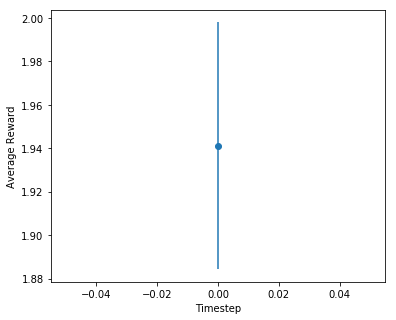

In [15]:
while step < num_iterations:
    # reset if it is the start of episode
    if observation is None:
        observation = deepcopy(env2.reset())
        agent.reset(observation)

    # agent pick action ...        

    if step <= args2.warmup:
        action = agent.random_action()
    else:
        action = agent.select_action(observation)

    # env2 response with next_observation, reward, terminate_info
    observation2, reward, done, info = env2.step(action)
    observation2 = deepcopy(observation2)
    if max_episode_length and episode_steps >= max_episode_length -1:
        done = True

    # agent observe and update policy
    agent.observe(reward, observation2, done)
    if step > args2.warmup:
        agent.update_policy()

    # [optional] evaluate
    if evaluate is not None and validate_steps > 0 and step % validate_steps == 0:
        policy = lambda x: agent.select_action(x, decay_epsilon=False)
        validate_reward = evaluate(env2, policy, debug=False, visualize=False)

    # [optional] save intermideate model
    if step % int(num_iterations/3) == 0:
        agent.save_model(output)

    # update 
    step += 1
    episode_steps += 1
    episode_reward += reward
    observation = deepcopy(observation2)
    
    if done: # end of episode

        agent.memory.append(
            observation,
            agent.select_action(observation),
            0., False
        )

        # reset
        observation = None
        episode_steps = 0
        episode_reward = 0.
        episode += 1
    if step%1000==0:
        np.save('reward_constrained_rl_1order24.npy',rewards)
        np.save('constraint_constrained_rl_1order24.npy',np.array([i/2 for i in constraints]))

In [16]:
np.save('reward_constrained_rl_1order24.npy',rewards)
np.save('constraint_constrained_rl_1order24.npy',np.array([i/2 for i in constraints]))

In [ ]:
args.card

In [ ]:
plt.plot(rewards[:1200]) #([sum(rewards[:i])/(i+1) for i in range(len(rewards))][5:])
plt.plot([562.7936945431538/10]*1200) #53.24204561097286,     1.7588713196437444
plt.title('Rewards without Constrained Terms')

In [ ]:
plt.plot([i/2 for i in constraints[:1200]])#([sum(constraints[:i])/(i+1) for i in range(len(constraints))][5:])
plt.title('Constrained Terms')

In [ ]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',60000)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
action2.dot(Q).dot(action2)

In [ ]:
aa=np.array([1,5,2,7,3])


In [ ]:
#rcpo https://arxiv.org/pdf/1805.11074.pdf